In [1]:
import cv2
import numpy as np
import os

In [327]:
import matplotlib.cm as cm

In [13]:
import matplotlib.pyplot as plt

In [350]:
import math

In [106]:
np.set_printoptions(threshold=np.inf)

In [17]:
def read_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [165]:
images = []
class_ = []
path='bearing/'
for folder in os.listdir(path):
    for file in os.listdir(path+folder):
        images.append(read_image(path+folder+'/'+file))
        class_.append(folder)

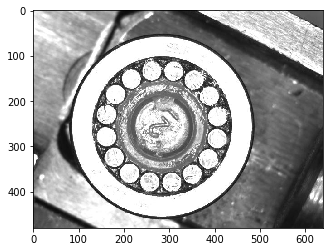

In [232]:
plt.imshow(images[0], cmap=cm.gray, vmin=0, vmax=255)

In [167]:
class_[0]

'Good'

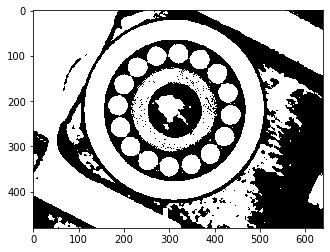

In [382]:
test = images[2].copy()
for i in range(test.shape[0]):
    for j in range(test.shape[1]):
        if test[i][j]<100:
            test[i][j]=0
        else:
            test[i][j]=255
plt.imshow(test, cmap=cm.gray, vmin=0, vmax=255)

In [383]:
image = test

In [384]:
m = image.shape[0]
n = image.shape[1]

In [385]:
def smoothen_image(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if i>0 and j>0 and i<image.shape[0]-1 and j<image.shape[1]-1:
                image[i][j] = int((image[i][j]+image[i-1][j]+image[i][j-1]+image[i+1][j]+image[i][j+1])/5)
    return image

In [386]:
def is_edge(image,x, threshold = 150):
    xi, xj = x
    if xi>0 and xj>0 and xi<image.shape[0]-1 and xj<image.shape[1]-1:
        for (i, j) in [(1,0),(0,1),(-1,0),(0,-1)]:
            if abs(image[xi+i][xj+j] - image[xi][xj])>threshold:
                    return True
    return False

In [387]:
edges = np.array([[0]*image.shape[1]]*image.shape[0])
#image = cv2.blur(image, (10,10))
for i in range(m):
    for j in range(n):
        if not is_edge(image, (i,j)):
            edges[i][j]=1

/home/aakash/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


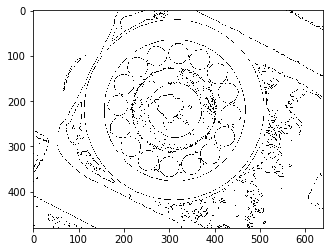

In [388]:
plt.imshow(edges, cmap=cm.gray, vmin=0, vmax=1)

In [351]:
def ecl_dist(x,y):
    return math.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

In [393]:
def is_center(A,B):
    C = (B[0],A[1])
    if abs(ecl_dist(A,C)-ecl_dist(B,C)) < 3:
        return True
    return False

In [372]:
def circumference_coords(C,R):
    degree = 0
    circumference = []
    while degree<360:
        xi = round(C[0]+R*math.cos(degree * math.pi / 180))
        xj = round(C[1]+R*math.sin(degree * math.pi / 180))
        circumference.append((xi, xj))
        degree+=0.01
    return set(circumference)

In [424]:
def is_circle(circumference, image):
    total = 0
    for i,j in list(circumference):
        if i<image.shape[0] and j<image.shape[1] and image[i][j]==0:
            total+=1
    if total/len(circumference)>0.05:
        return True
    return False

In [425]:
def find_circle(image,A,B):
    m = image.shape[0]
    n = image.shape[1]
    got_A = False
    got_B = False
    is_done = False
    for i in range(A[0],m):
        for j in range(0,n):
            if i==m-1 and j==n-1:
                is_done=True
                return None, None, A, B, None, is_done
            if i==A[0] and j<=A[1]:
                continue
            if image[i][j]==0:
                A = (i,j)
                got_A=True
                break
        if got_A:
            break
    
    
    for j in range(0,n):
        for i in range(A[0],m):
            if image[i][j]==0:
                B = (i,j)
                got_B=True
                break
        if got_B:
            break
    
    if got_A and got_B and is_center(A,B):
        C = (B[0],A[1])
        R = ecl_dist(A, C)
        circumference = circumference_coords(C,R)
        
        if is_circle(circumference, image):
            return circumference, R, A, B, C, is_done
    return None, None, A, B, None, None

In [426]:
A = (0,0)
B = (0,0)
max_R = 0
max_C = None
max_circum = None
while True:
    circum, R, A, B, C, is_done = find_circle(edges, A, B)
    #print(R)
    if is_done:
        break
    if R is not None:
        if R>max_R:
            max_R = R
            max_C = C
            max_circum = circum

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
0.0
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

0.0
0.0
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
No

5.0
5.0
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
0.0
0.0
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
0.0
None
None
None
None
None
None
None
None
None
None


0.0
0.0
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
0.0
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
0.0
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
0.0
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
0.0
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [427]:
max_R

32.0

In [428]:
max_C

(315, 32)

In [430]:
len(max_circum)

256